## Daily Challenge: Exploring The World Happiness Report With Matplotlib

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 57.0MB/s]


In [5]:
!unzip world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [9]:
df = pd.read_csv(r'/content/2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Address missing values and adjust data types as necessary.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [11]:
df.drop_duplicates()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

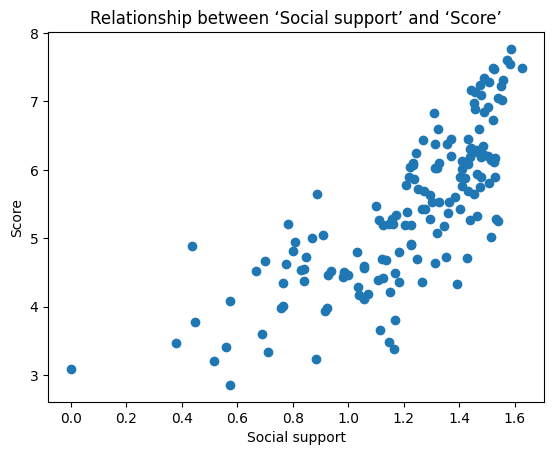

In [45]:
import matplotlib.pyplot as plt

x = [i for i in df['Social support']]
y = [i for i in df['Score']]

plt.scatter(x, y)
plt.title("Relationship between ‘Social support’ and ‘Score’")
plt.xlabel("Social support")
plt.ylabel("Score")
plt.show()

Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.

In [39]:
GDP_by_country = df.groupby('Country or region', as_index = False).agg({'GDP per capita':'mean'})
Life_by_country = df.groupby('Country or region', as_index = False).agg({'Healthy life expectancy':'mean'})

<Figure size 1800x600 with 0 Axes>

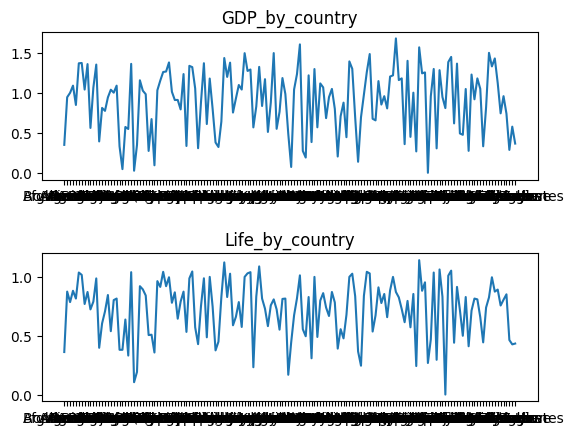

In [49]:
# Create a figure and a set of subplots
plt.figure(figsize = (18,6))
fig, (ax1, ax2) = plt.subplots(2, 1)

# First subplot
x = [i for i in GDP_by_country['Country or region']]
y = [i for i in GDP_by_country['GDP per capita']]
ax1.plot(x,y)
ax1.set_title('GDP_by_country')

# Second subplot
x2 = [i for i in Life_by_country['Country or region']]
y2 = [i for i in Life_by_country['Healthy life expectancy']]
ax2.plot(x2, y2)
ax2.set_title('Life_by_country')

# Show the figure
plt.subplots_adjust(hspace=0.5)
plt.show()

Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.

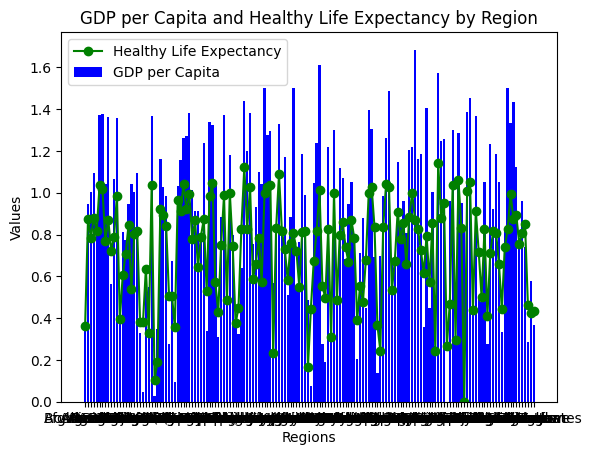

In [36]:
# Bar plot for GDP per Capita
plt.bar(x, y, label='GDP per Capita', color='blue')

# Line plot for Healthy Life Expectancy
plt.plot(x2, y2, label='Healthy Life Expectancy', marker='o', color='green')

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Values')
plt.title('GDP per Capita and Healthy Life Expectancy by Region')

# Add a legend
plt.legend()

# Show the plot
plt.show()